In [2]:
import torch
from transformer_lens import HookedTransformer
from transformers import AutoTokenizer

# Check if a GPU is available and set the device
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

# Specify the model ID
# model_id = "meta-llama/Llama-2-7b-hf" 
model_id = "meta-llama/Meta-Llama-3-8B"
# model_id = 'Qwen/Qwen1.5-7B'

# Load the tokenizer from the Hugging Face library
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load the model with TransformerLens, specifying the torch_dtype as torch.float16 to reduce memory usage
model = HookedTransformer.from_pretrained_no_processing(model_id, torch_dtype=torch.bfloat16, device=device)
model.eval()

tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/home/zcai75/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/31.7k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model Qwen/Qwen1.5-7B into HookedTransformer


In [3]:
import random 

def generate_examples(N, opA_fraction, opB_fraction, opC_fraction, opD_fraction):
    # random.seed(0)
    total_fraction = opA_fraction + opB_fraction + opC_fraction + opD_fraction
    opA_count = round(N * opA_fraction / total_fraction)
    opB_count = round(N * opB_fraction / total_fraction)
    opC_count = round(N * opC_fraction / total_fraction)
    opD_count = N - opA_count - opB_count - opC_count

    operations = ['opA'] * opA_count + ['opB'] * opB_count + ['opC'] * opC_count + ['opD'] * opD_count
    # print(operations)
    examples = []

    for i in range(N):
        operation = operations[i]
        if operation == 'opA' or operation == 'opB':
            A = random.randint(10, 99)  # Ensure A has two digits
            B = random.randint(10, 99)  # Ensure B has two digits
        else:
            A = random.randint(10, 89)
            B = random.randint(10, 99-A)

        if operation == 'opA':
            C = A
        elif operation == 'opB':
            C = B
        elif operation == 'opC':
            C = A+B
            # example = f"{A} @ {C}"
        else:  # opD
            C = A-1
            # example = f"{A} @ {C}" 

        assert len(str(C)) == 2
        example = f"{A}@{B}={C}"
        examples.append(example)

    random.shuffle(examples)

    return examples

# prompt = '\n 11 @ 22 = '
# dataset = ['\n'.join(generate_examples(100, 0.5, 0.5, 0, 0)) + prompt for _ in range(100)]
# dataset_A = ['\n'.join(generate_examples(100, 1, 0, 0, 0)) + prompt for _ in range(100)]
# dataset_B = ['\n'.join(generate_examples(100, 0, 1, 0, 0)) + prompt for _ in range(100)]
dataset = ['\n'.join(generate_examples(100, 0.5, 0.5, 0, 0))[:-2] for _ in range(100)]
dataset_A = ['\n'.join(generate_examples(100, 1, 0, 0, 0))[:-2] for _ in range(100)]
dataset_B = ['\n'.join(generate_examples(100, 0, 1, 0, 0))[:-2] for _ in range(100)]
print(dataset_A)
print(dataset_B)

['73@12=73\n79@84=79\n52@81=52\n42@16=42\n35@89=35\n10@86=10\n77@74=77\n68@18=68\n18@60=18\n80@62=80\n86@32=86\n96@34=96\n17@25=17\n88@55=88\n75@88=75\n74@21=74\n40@91=40\n32@51=32\n33@94=33\n40@37=40\n80@47=80\n39@94=39\n27@50=27\n68@34=68\n36@91=36\n57@60=57\n12@68=12\n51@60=51\n57@46=57\n45@60=45\n94@65=94\n51@95=51\n53@78=53\n29@66=29\n90@67=90\n58@16=58\n64@80=64\n95@90=95\n48@54=48\n92@66=92\n48@65=48\n35@68=35\n64@60=64\n97@50=97\n44@26=44\n95@99=95\n89@33=89\n19@87=19\n53@55=53\n91@26=91\n12@20=12\n62@85=62\n67@54=67\n16@32=16\n20@26=20\n22@89=22\n79@29=79\n53@26=53\n83@39=83\n69@50=69\n19@70=19\n75@42=75\n98@14=98\n78@56=78\n14@68=14\n39@16=39\n21@71=21\n32@71=32\n50@48=50\n98@33=98\n85@83=85\n87@63=87\n42@38=42\n41@41=41\n23@20=23\n46@19=46\n23@27=23\n11@25=11\n71@53=71\n12@49=12\n56@99=56\n39@76=39\n95@24=95\n44@56=44\n63@11=63\n74@84=74\n62@17=62\n86@18=86\n25@33=25\n88@17=88\n17@10=17\n62@66=62\n64@31=64\n62@86=62\n35@85=35\n78@69=78\n14@86=14\n32@58=32\n52@27=52\n16@23=',

In [4]:
from transformer_lens import HookedTransformer
from transformer_lens.hook_points import HookPoint
from transformer_lens.utils import get_act_name
from functools import partial
from tqdm.notebook import tqdm
from collections import defaultdict

# layers = [12, 14]
layers = list(range(0, 32, 1))

# THis hook will collect the activations at the specified layer
def hook(task_vecs, value, hook: HookPoint):
    task_vecs[hook.layer()].append(value.cpu().float().detach())

# Function to generate text
def get_task_vecs(prompt):
    with torch.no_grad():
        task_vecs = defaultdict(list)
        all_inputs = tokenizer(prompt, return_tensors="pt", padding='longest').input_ids
        print(all_inputs.shape)
        B = 8
        for i in tqdm(range(0, len(prompt), B)):
            inputs = all_inputs[i:i+B].to(device)
            fwd_hooks = [(get_act_name('resid_post', layer), partial(hook, task_vecs)) for layer in layers]
            output = model.run_with_hooks(inputs, fwd_hooks=fwd_hooks).cpu()
            inputs.cpu()

    torch.cuda.empty_cache()
    return {k: torch.cat(x) for k, x in task_vecs.items()}



In [5]:
task_vecs_A = get_task_vecs(dataset_A)
task_vecs_B = get_task_vecs(dataset_B)

torch.Size([100, 897])


  0%|          | 0/13 [00:00<?, ?it/s]

torch.Size([100, 897])


  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
# sanity check
# inputs = tokenizer(dataset[0], return_tensors="pt").to(device)
# output = model.run_with_hooks(inputs.input_ids, fwd_hooks=[]).cpu().detach()
# print(output.shape)
# top2_val, top2_idx = torch.topk(output[:, -2], 2) # -2 is the location of the equal sign
# print('top 2 predictions:', tokenizer.decode(top2_idx[0, 0]), tokenizer.decode(top2_idx[0, 1]))

task_vecs_mixed = get_task_vecs(dataset)

[torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096]), torch.Size([100, 1111, 4096])]


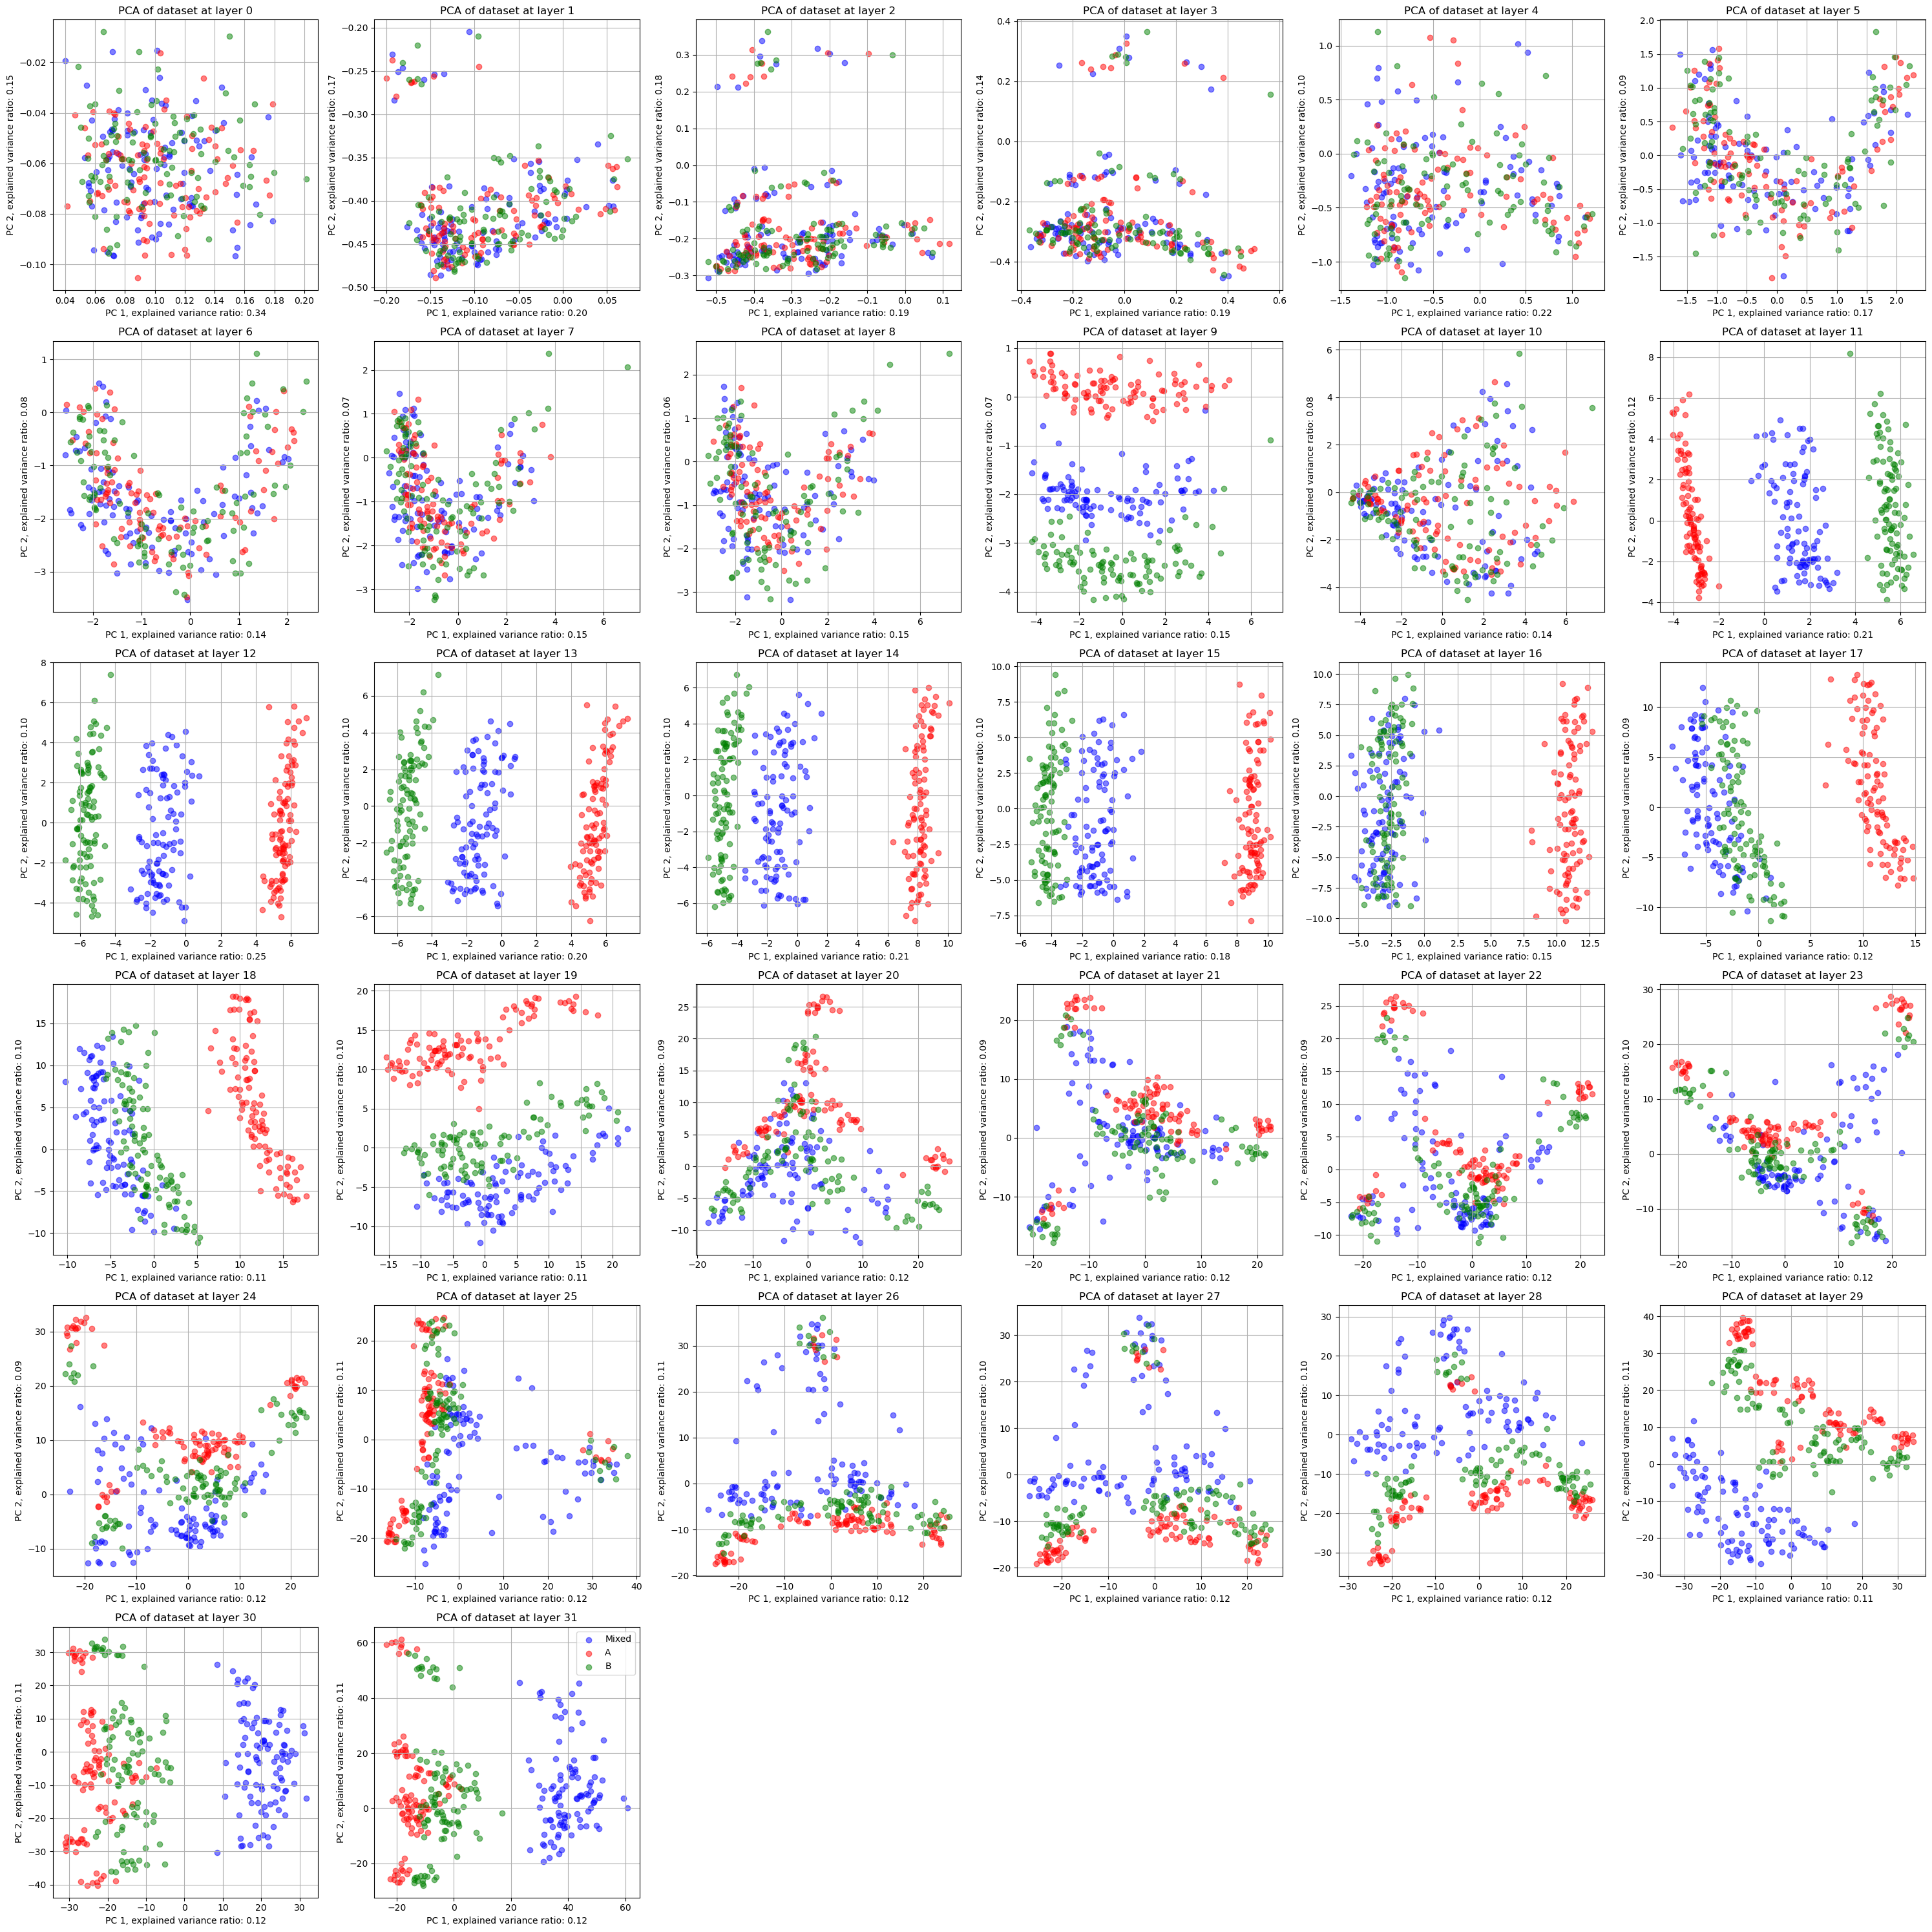

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Determine the grid size for the subplots
grid_size = int(np.ceil(np.sqrt(len(model.blocks))))

fig, axs = plt.subplots(grid_size, grid_size, figsize=(30, 30))

for layer in layers:
    # Standardizing the features
    all_task_vecs = torch.cat([task_vecs_A[layer], task_vecs_mixed[layer], task_vecs_B[layer]])
    X = StandardScaler().fit_transform(all_task_vecs[:, -1, :].float().numpy())

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(X)
    pc_mixed = pca.transform(task_vecs_mixed[layer][:, -1, :].float().numpy())
    pc_A = pca.transform(task_vecs_A[layer][:, -1, :].float().numpy())
    pc_B = pca.transform(task_vecs_B[layer][:, -1, :].float().numpy())

    # Plot the PCA result
    ax = axs[layer // grid_size, layer % grid_size]
    ax.scatter(pc_mixed[:, 0], pc_mixed[:, 1], label='Mixed', alpha=0.5, color='blue')
    ax.scatter(pc_A[:, 0], pc_A[:, 1], label='A', alpha=0.5, color='red')
    ax.scatter(pc_B[:, 0], pc_B[:, 1], label='B', alpha=0.5, color='green')
    ax.set_title(f'PCA of dataset at layer {layer}')
    ax.set_xlabel('PC 1, explained variance ratio: {:.2f}'.format(pca.explained_variance_ratio_[0]))
    ax.set_ylabel('PC 2, explained variance ratio: {:.2f}'.format(pca.explained_variance_ratio_[1]))
    ax.grid()

# Remove empty subplots
for layer in range(len(model.blocks), grid_size*grid_size):
    fig.delaxes(axs.flatten()[layer])

plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# act = []
# def hook2(act, value, hook: HookPoint):
#     act.append(value.cpu().float().detach())

# B = 1 # Bz 1 will max out the GPU memory
# for i in tqdm(range(0, len(dataset), B)):
#     model.remove_all_hook_fns()
#     fwd_hooks = [(get_act_name('normalized'), partial(hook2, act))]
#     inputs = tokenizer(dataset[i:i+B], return_tensors="pt").to(device)
#     output = model.run_with_hooks(inputs.input_ids, fwd_hooks=fwd_hooks).cpu().detach()


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
dataset9010 = ['\n'.join(generate_examples(30, 0.9, 0.1, 0, 0)) + prompt for _ in range(100)]
task_vecs_9010 = get_task_vecs(dataset9010)

dataset1090 = ['\n'.join(generate_examples(30, 0.1, 0.9, 0, 0)) + prompt for _ in range(100)]
task_vecs_1090 = get_task_vecs(dataset1090)

dict_keys([0, 4, 8, 12, 16, 20, 24, 28])


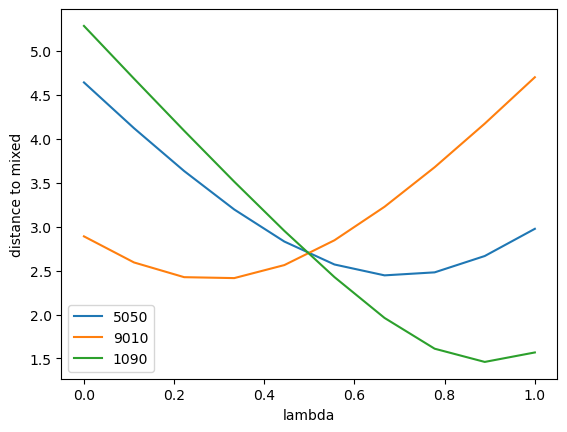

In [ ]:
import matplotlib.pyplot as plt

print(task_vecs_mixed.keys())
layer = 16
tv_5050 = task_vecs_mixed[layer][:, -2, :].float().mean(0).numpy()
tv_9010 = task_vecs_9010[layer][:, -2, :].float().mean(0).numpy()
tv_1090 = task_vecs_1090[layer][:, -2, :].float().mean(0).numpy()
tv_A = task_vecs_A[layer][:, -2, :].float().mean(0).numpy()
tv_B = task_vecs_B[layer][:, -2, :].float().mean(0).numpy()

lamb_values = np.linspace(0, 1, 10)
distances = defaultdict(list)

for i, tv_mixed in enumerate([tv_5050, tv_9010, tv_1090]):
    for lamb in lamb_values:
        tv = (1-lamb) * tv_A + lamb * tv_B
        distance = np.linalg.norm(tv - tv_mixed)
        distances[i].append(distance)

plt.plot(lamb_values, distances[0], label='5050')
plt.plot(lamb_values, distances[1], label='9010')
plt.plot(lamb_values, distances[2], label='1090')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('distance to mixed')
plt.show()


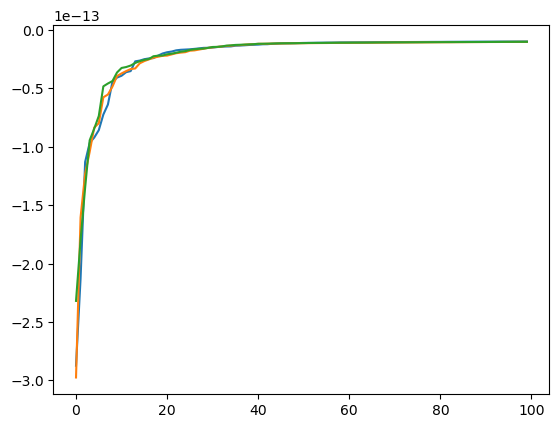

In [ ]:
import numpy as np
tol = 100
mixed_matrix = StandardScaler().fit_transform(task_vecs_mixed[layers[0]][:, -2, :].float().numpy())
A_matrix = StandardScaler().fit_transform(task_vecs_A[layers[0]][:, -2, :].float().numpy())
B_matrix = StandardScaler().fit_transform(task_vecs_B[layers[0]][:, -2, :].float().numpy())

plt.plot(np.linalg.eigvalsh(np.cov(mixed_matrix.T))[:tol], label='mixed')
plt.plot(np.linalg.eigvalsh(np.cov(A_matrix.T))[:tol], label='A')
plt.plot(np.linalg.eigvalsh(np.cov(B_matrix.T))[:tol], label='B')

In [10]:
import numpy as np 
from matplotlib import pyplot as plt

def plot_task_vec_interpolation(task_vecs_A, task_vecs_B, target_layers, title='', question='', target_tokens=[], labels={}):
    plt.figure(figsize=(10, 4))
    # for target_layer in range(10, 21):
    for target_layer in target_layers:

        # tv_5050 = task_vecs_mixed[target_layer][:, -1, :].mean(0)
        tv_A = task_vecs_A[target_layer][:, -1, :].mean(0)
        tv_B = task_vecs_B[target_layer][:, -1, :].mean(0)

        prob_dict = defaultdict(list)
        lambs = np.linspace(0, 1, 30)
        for lamb in lambs:
            tv_mix = (lamb * tv_A + (1-lamb) * tv_B)
            def patch_hook(value, hook: HookPoint):
                value[:, -1, :] = tv_mix
                return value

            inputs = tokenizer(question, return_tensors="pt").to(device)
            with torch.no_grad():
                output = model.run_with_hooks(inputs.input_ids, fwd_hooks=[(get_act_name('resid_post', target_layer), patch_hook)]).cpu().detach()
            probs = output[:, -1].softmax(dim=-1)
            # -------- debug --------
            # top2_val, top2_idx = torch.topk(output[:, -1], 6)
            # top2_probs = torch.topk(probs, 6)
            # t = [tokenizer.decode(top2_idx[0, i]) for i in range(6)]
            # print('top 2 predictions:', t)
            # print('top 2 probabilities:', top2_probs.values)
            # ----------------------
            target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
            target_probs = torch.gather(probs, 1, torch.tensor(target_ids).unsqueeze(0)).squeeze()
            for token, p in zip(target_tokens, target_probs):
                prob_dict[token].append(p.float().item())
            prob_dict['other'].append(1 - sum(target_probs).float().item())

        for token, prob_list in prob_dict.items():
            plt.plot(lambs, prob_list, label=labels[token])

    # plt.title(title + '\nQuestion: ' + repr(question)[1:-1] + '(' + '|'.join(target_tokens) + ')')
    plt.xlabel('lambda')
    plt.ylabel('P_token')
    plt.ylim(0, 1)
    plt.legend()
    torch.cuda.empty_cache()
    plt.savefig(f'./{title}.pdf')

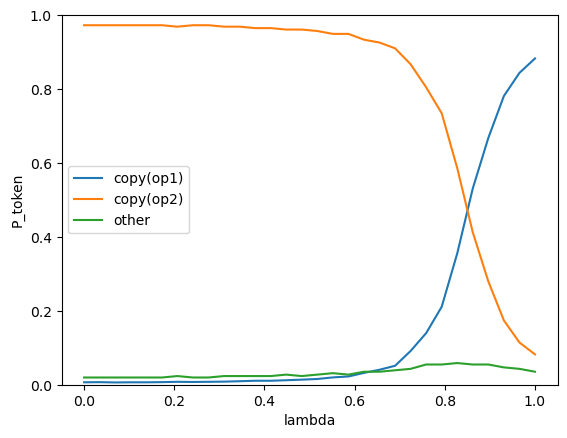

In [13]:
plot_task_vec_interpolation(task_vecs_A, task_vecs_B, [16], 'task_vector_interpolation_copyAB_qwen', '\n11@22=', ['1', '2'], {'1': 'copy(op1)', '2': 'copy(op2)', 'other': 'other'})


In [8]:
dataset_AplusB = ['\n'.join(generate_examples(100, 0, 0, 1, 0)).rsplit('=', 1)[0] + '=' for _ in range(100)]
task_vecs_AplusB = get_task_vecs(dataset_AplusB)

torch.Size([100, 897])


  0%|          | 0/13 [00:00<?, ?it/s]

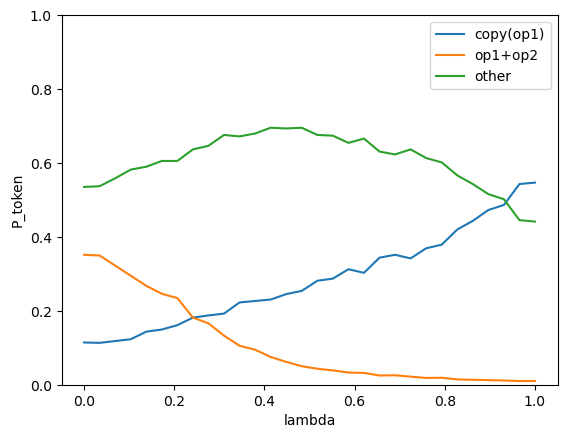

: 

In [ ]:
plot_task_vec_interpolation(task_vecs_A, task_vecs_AplusB, [14], 'task_vector_interpolation_copyAAplusB_qwen', '\n54@24=', ['5', '7'], {'5': 'copy(op1)', '7': 'op1+op2', 'other': 'other'})

In [25]:
def patch_hook(tv_mix, value, hook: HookPoint):
    value[:, -1, :] = tv_mix
    return value

def get_eval_results(task):
    if task == 'A':
        opA_fraction, opB_fraction, opC_fraction, opD_fraction = 1, 0, 0, 0
        task_vecs = task_vecs_A
    elif task == 'B':
        opA_fraction, opB_fraction, opC_fraction, opD_fraction = 0, 1, 0, 0
        task_vecs = task_vecs_B
    elif task == 'AplusB':
        opA_fraction, opB_fraction, opC_fraction, opD_fraction = 0, 0, 1, 0
        task_vecs = task_vecs_AplusB

    eval_prompts = []
    eval_ans = []
    for _ in range(100):
        prompt, ans = '\n'.join(generate_examples(1, opA_fraction, opB_fraction, opC_fraction, opD_fraction)).rsplit('=', 1)
        prompt = '\n' + prompt + '='
        eval_prompts.append(prompt)
        eval_ans.append(ans)
    acc_A = []
    for layer in tqdm(layers):
        tv_A = task_vecs[layer][:, -1, :].mean(0)
        # tv_A = task_vecs[layer][:, -1, :][0]
        num_correct = 0
        with torch.no_grad():
            B = 100 # Bz 1 will max out the GPU memory
            for i in range(0, len(eval_prompts), B):
                inputs = tokenizer(eval_prompts[i:i+B], return_tensors="pt").to(device)
                output = model.run_with_hooks(inputs.input_ids, fwd_hooks=[(get_act_name('resid_post', layer), partial(patch_hook, tv_A))]).cpu().detach()
                top2_val, top2_idx = torch.topk(output[:, -1], 6) # -2 is the location of the equal sign
                probs = output[:, -1].softmax(dim=-1)
                top2_probs = torch.topk(probs, 6)
                t = [tokenizer.decode(top2_idx[j, 0]) for j in range(B)]
                # print(eval_prompts[i:i+B])
                # print(t)
                # print(eval_ans[i:i+B])
                if model_id == "meta-llama/Meta-Llama-3-8B":
                    # numbers are not tokenized digit by digit so do full match
                    num_correct += sum([t[j] == eval_ans[j] for j in range(i, i+B)])
                elif model_id == "meta-llama/Llama-2-7b-hf" or model_id == "Qwen/Qwen1.5-7B":
                    num_correct += sum([t[j-i] == eval_ans[j][0] for j in range(i, i+B)])
        acc_A.append(num_correct / len(eval_prompts))
    
    return acc_A




In [27]:
acc_A = get_eval_results('A')
acc_B = get_eval_results('B')

  0%|          | 0/32 [00:00<?, ?it/s]

['\n57@67=', '\n33@59=', '\n44@33=', '\n34@89=', '\n37@71=', '\n54@78=', '\n48@66=', '\n63@97=', '\n85@53=', '\n53@99=', '\n54@79=', '\n24@76=', '\n15@50=', '\n12@13=', '\n10@75=', '\n43@95=', '\n55@99=', '\n31@37=', '\n29@71=', '\n36@55=', '\n36@88=', '\n15@73=', '\n11@88=', '\n97@73=', '\n68@99=', '\n91@61=', '\n40@81=', '\n91@86=', '\n19@39=', '\n23@23=', '\n52@78=', '\n49@96=', '\n24@87=', '\n98@45=', '\n60@90=', '\n73@52=', '\n74@86=', '\n31@99=', '\n35@67=', '\n82@87=', '\n58@61=', '\n59@57=', '\n95@59=', '\n46@86=', '\n78@18=', '\n97@13=', '\n44@41=', '\n56@49=', '\n82@58=', '\n18@88=', '\n48@46=', '\n16@16=', '\n73@23=', '\n22@75=', '\n32@67=', '\n84@87=', '\n23@60=', '\n54@41=', '\n19@19=', '\n97@13=', '\n87@36=', '\n38@80=', '\n56@36=', '\n88@79=', '\n70@12=', '\n65@82=', '\n17@45=', '\n36@31=', '\n76@87=', '\n34@73=', '\n30@32=', '\n59@82=', '\n61@71=', '\n43@16=', '\n25@87=', '\n23@64=', '\n12@35=', '\n64@79=', '\n40@99=', '\n23@20=', '\n29@62=', '\n44@21=', '\n14@15=', '\n

  0%|          | 0/32 [00:00<?, ?it/s]

['\n90@47=', '\n21@46=', '\n70@43=', '\n64@42=', '\n69@34=', '\n51@41=', '\n33@18=', '\n41@59=', '\n67@50=', '\n27@92=', '\n80@18=', '\n46@55=', '\n34@80=', '\n31@41=', '\n23@33=', '\n11@99=', '\n40@57=', '\n91@12=', '\n37@79=', '\n23@77=', '\n65@95=', '\n17@14=', '\n42@51=', '\n52@63=', '\n56@67=', '\n70@13=', '\n38@83=', '\n37@19=', '\n88@62=', '\n46@41=', '\n53@35=', '\n84@12=', '\n42@28=', '\n96@78=', '\n77@67=', '\n46@27=', '\n13@50=', '\n53@29=', '\n94@85=', '\n88@75=', '\n51@22=', '\n49@92=', '\n42@41=', '\n22@10=', '\n30@43=', '\n44@60=', '\n55@45=', '\n91@95=', '\n11@25=', '\n33@56=', '\n19@24=', '\n13@57=', '\n81@92=', '\n18@54=', '\n74@84=', '\n65@60=', '\n53@40=', '\n57@93=', '\n74@72=', '\n43@59=', '\n20@36=', '\n58@92=', '\n59@24=', '\n74@85=', '\n72@81=', '\n44@42=', '\n52@60=', '\n22@51=', '\n81@16=', '\n18@13=', '\n13@66=', '\n81@74=', '\n45@43=', '\n64@87=', '\n96@47=', '\n90@81=', '\n70@72=', '\n36@90=', '\n31@34=', '\n10@76=', '\n53@84=', '\n35@83=', '\n93@89=', '\n

In [26]:
acc_AplusB = get_eval_results('AplusB')


  0%|          | 0/32 [00:00<?, ?it/s]

['\n12@50=', '\n71@18=', '\n38@51=', '\n76@13=', '\n87@12=', '\n45@44=', '\n33@11=', '\n75@14=', '\n30@40=', '\n50@30=', '\n89@10=', '\n68@27=', '\n32@41=', '\n73@11=', '\n72@15=', '\n64@27=', '\n57@42=', '\n42@55=', '\n16@73=', '\n69@11=', '\n80@18=', '\n74@10=', '\n56@10=', '\n30@21=', '\n81@11=', '\n21@22=', '\n84@14=', '\n22@27=', '\n54@16=', '\n15@79=', '\n63@32=', '\n78@18=', '\n39@33=', '\n27@28=', '\n22@45=', '\n13@33=', '\n78@18=', '\n32@63=', '\n34@10=', '\n46@37=', '\n33@18=', '\n18@10=', '\n42@38=', '\n16@35=', '\n46@39=', '\n16@61=', '\n17@28=', '\n49@10=', '\n22@63=', '\n57@26=', '\n83@10=', '\n40@51=', '\n35@26=', '\n70@10=', '\n28@30=', '\n70@23=', '\n33@19=', '\n52@26=', '\n34@48=', '\n49@47=', '\n58@34=', '\n72@11=', '\n44@36=', '\n42@40=', '\n29@52=', '\n70@12=', '\n66@26=', '\n61@24=', '\n37@25=', '\n76@22=', '\n50@16=', '\n75@23=', '\n87@10=', '\n17@57=', '\n58@25=', '\n18@57=', '\n53@27=', '\n88@11=', '\n43@51=', '\n24@54=', '\n56@43=', '\n12@85=', '\n66@21=', '\n

Text(0.5, 1.0, 'Layer vs Accuracy for Qwen/Qwen1.5-7B')

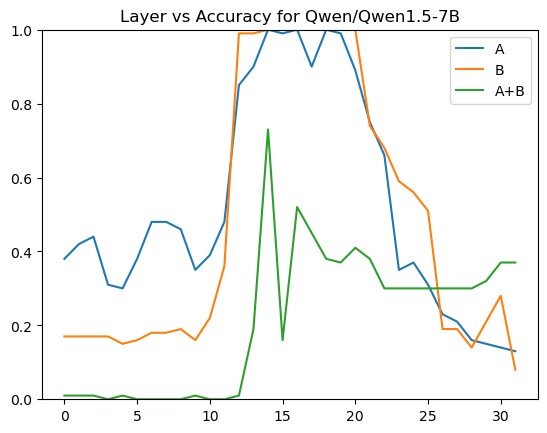

In [28]:
from matplotlib import pyplot as plt

plt.plot(layers, acc_A, label='A')
plt.plot(layers, acc_B, label='B')
plt.plot(layers, acc_AplusB, label='A+B')
plt.legend()
plt.ylim(0,1)
plt.title('Layer vs Accuracy for ' + model_id)

# plt.vlines([11, 12, 13, 14, 15], 0, 1)


In [11]:
import string

def generate_lexi_examples(N, opA_fraction, opB_fraction):
    "Capitalize the letter, or output the next letter in the alphabet"
    total_fraction = opA_fraction + opB_fraction
    opA_count = round(N * opA_fraction / total_fraction)
    opB_count = N - opA_count
    
    operations = ['opA'] * opA_count + ['opB'] * opB_count
    examples = []
    
    for i in range(N):
        operation = operations[i]
        letter = random.choice(string.ascii_letters)
        
        if operation == 'opA':
            if letter.isupper():
                new_letter = letter.lower()
            else:
                new_letter = letter.upper()
        else:
            idx = string.ascii_letters.index(letter)
            new_letter = string.ascii_letters[(idx + 1) % 52]
        
        example = f"{letter}@{new_letter}"
        examples.append(example)
        
    random.shuffle(examples)
    
    return examples

prompt = '\nj@'
dataset = ['\n'.join(generate_lexi_examples(200, 0.5, 0.5)) + prompt for _ in range(100)]
dataset_A = ['\n'.join(generate_lexi_examples(200, 1, 0)) + prompt for _ in range(100)]
dataset_B = ['\n'.join(generate_lexi_examples(200, 0, 1)) + prompt for _ in range(100)]

task_vecs_A = get_task_vecs(dataset_A)
task_vecs_B = get_task_vecs(dataset_B)
task_vecs_mixed = get_task_vecs(dataset)


torch.Size([100, 803])


  0%|          | 0/13 [00:00<?, ?it/s]

: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


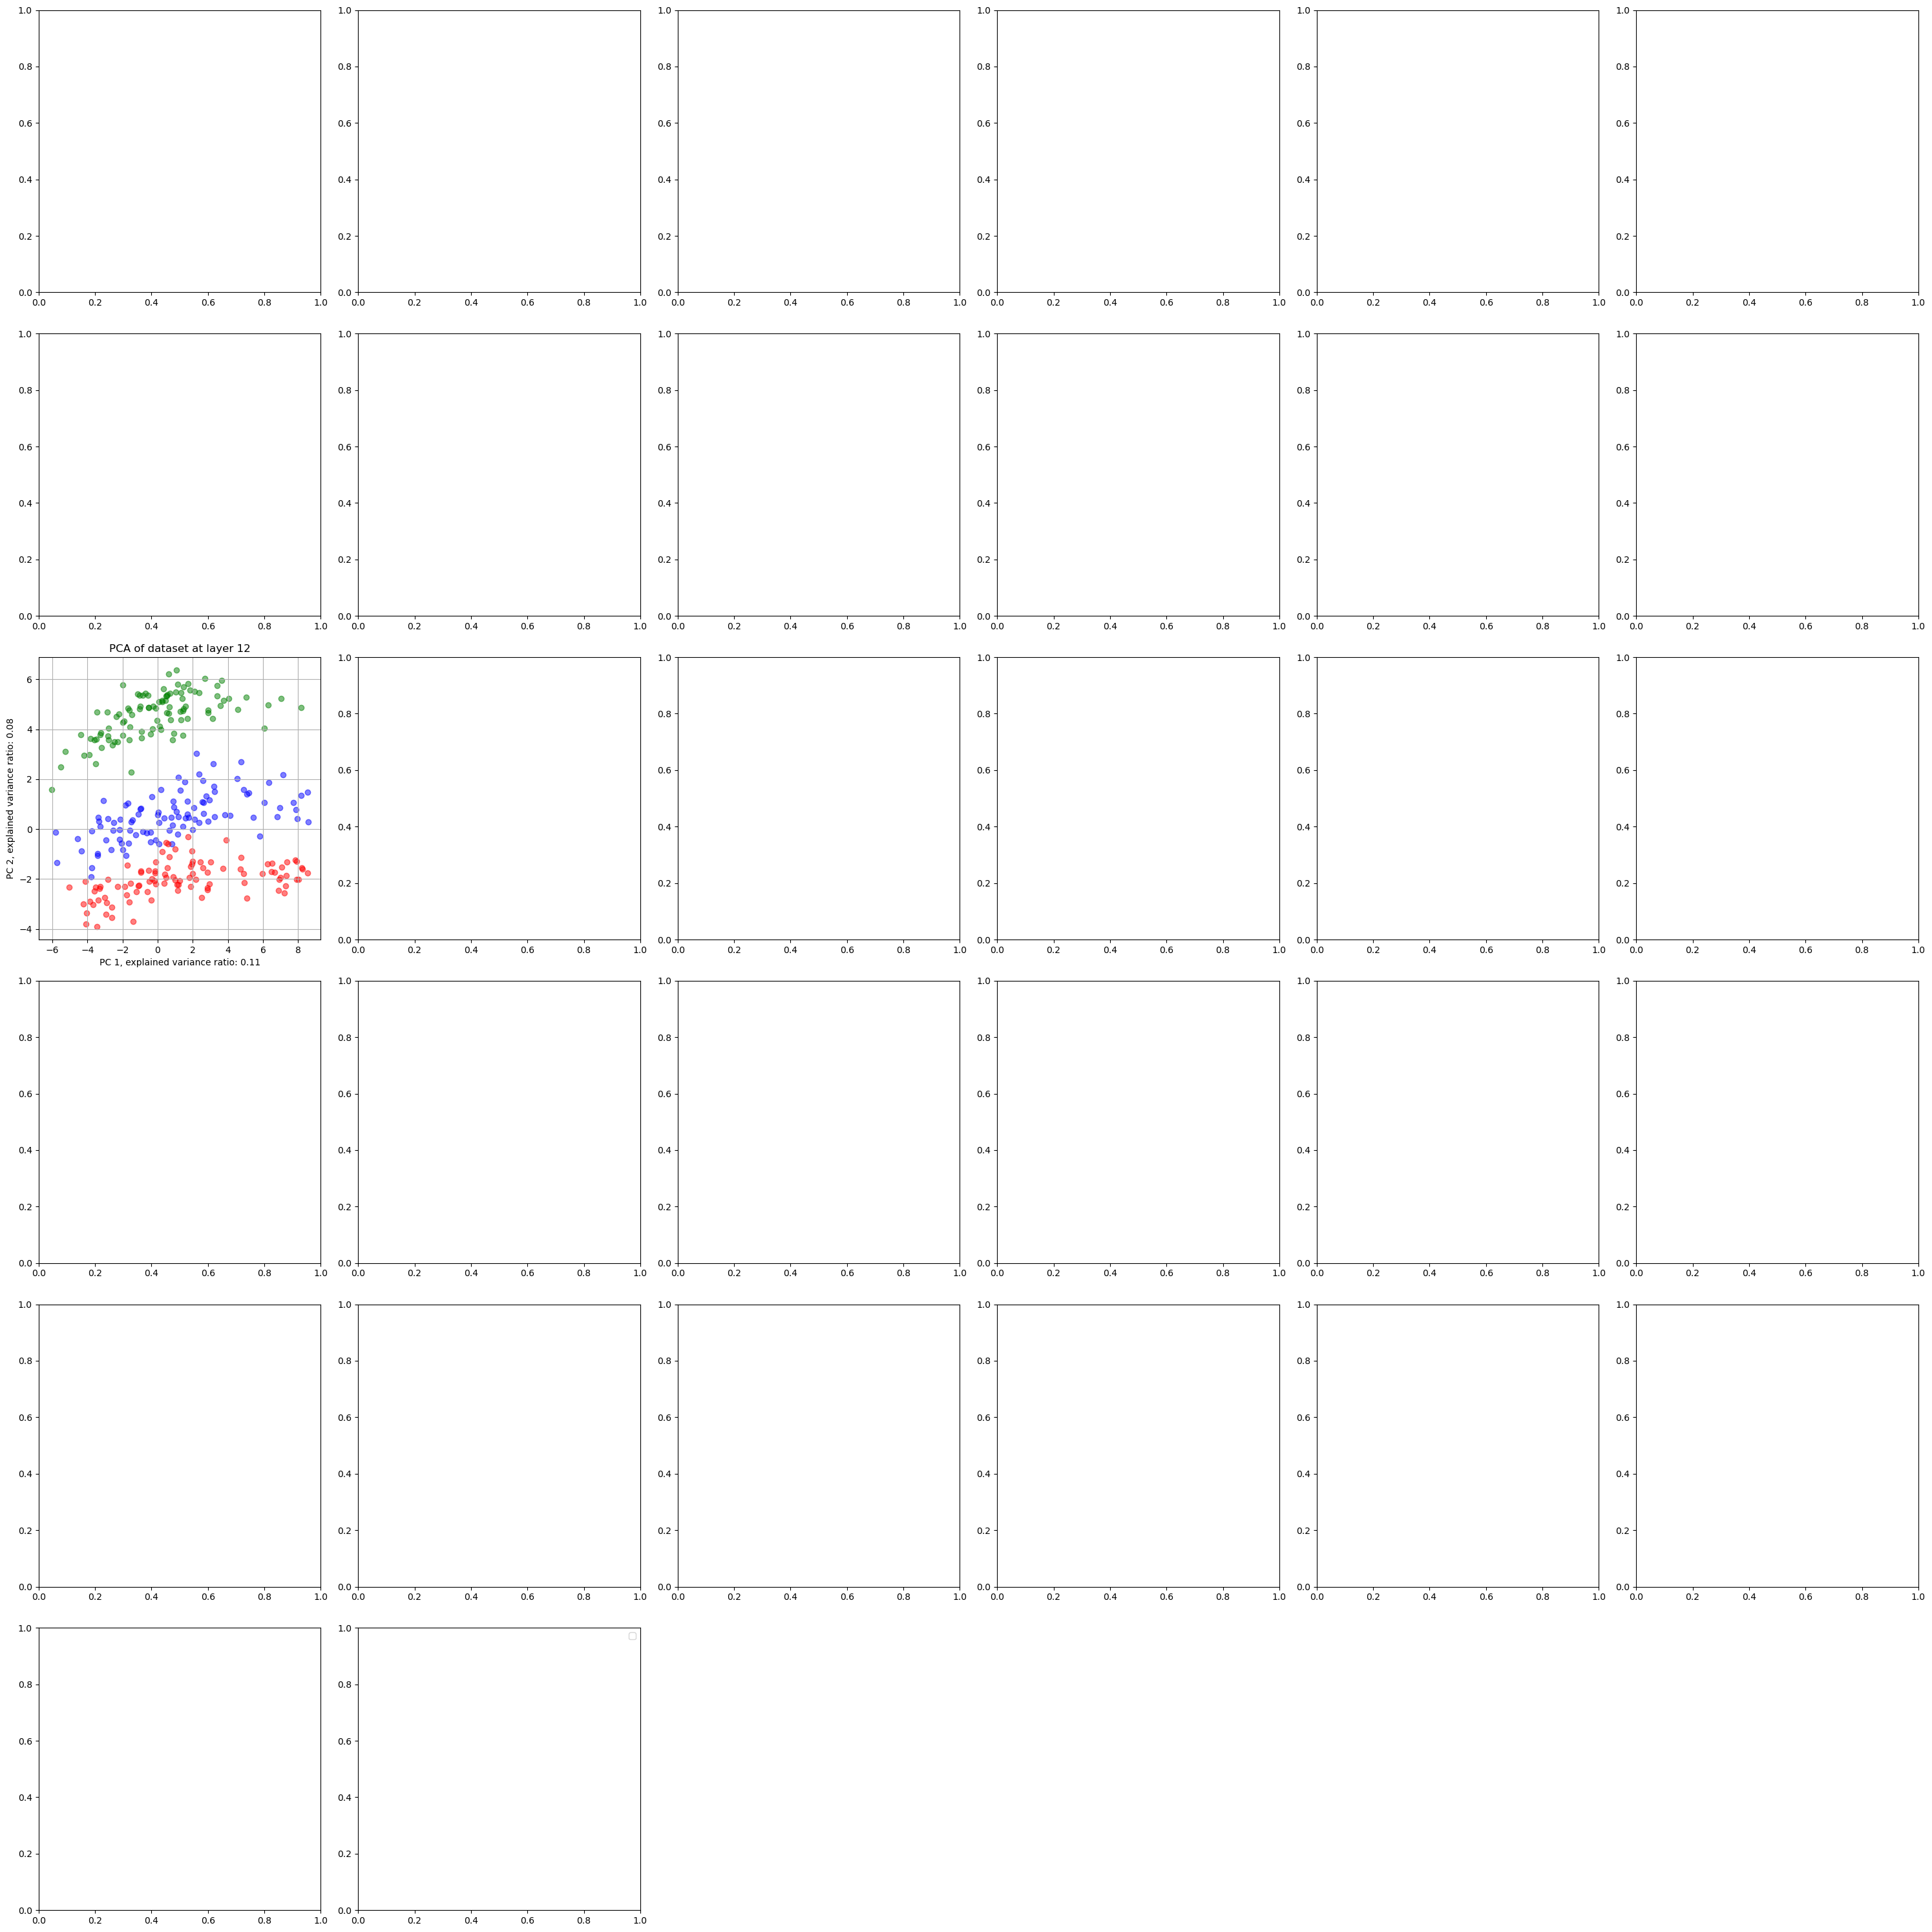

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Determine the grid size for the subplots
grid_size = int(np.ceil(np.sqrt(len(model.blocks))))

fig, axs = plt.subplots(grid_size, grid_size, figsize=(30, 30))

for layer in layers:
    # Standardizing the features
    all_task_vecs = torch.cat([task_vecs_A[layer], task_vecs_mixed[layer], task_vecs_B[layer]])
    X = StandardScaler().fit_transform(all_task_vecs[:, -2, :].float().numpy())

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(X)
    pc_mixed = pca.transform(task_vecs_mixed[layer][:, -2, :].float().numpy())
    pc_A = pca.transform(task_vecs_A[layer][:, -2, :].float().numpy())
    pc_B = pca.transform(task_vecs_B[layer][:, -2, :].float().numpy())

    # Plot the PCA result
    ax = axs[layer // grid_size, layer % grid_size]
    ax.scatter(pc_mixed[:, 0], pc_mixed[:, 1], label='Mixed', alpha=0.5, color='blue')
    ax.scatter(pc_A[:, 0], pc_A[:, 1], label='A', alpha=0.5, color='red')
    ax.scatter(pc_B[:, 0], pc_B[:, 1], label='B', alpha=0.5, color='green')
    ax.set_title(f'PCA of dataset at layer {layer}')
    ax.set_xlabel('PC 1, explained variance ratio: {:.2f}'.format(pca.explained_variance_ratio_[0]))
    ax.set_ylabel('PC 2, explained variance ratio: {:.2f}'.format(pca.explained_variance_ratio_[1]))
    ax.grid()

# Remove empty subplots
for layer in range(len(model.blocks), grid_size*grid_size):
    fig.delaxes(axs.flatten()[layer])

plt.tight_layout()
plt.legend()
plt.show()

In [10]:
target_layer = 14

# tv_5050 = task_vecs_mixed[target_layer][:, -1, :].mean(0)
tv_A = task_vecs_A[target_layer][:, -1, :].mean(0)
tv_B = task_vecs_B[target_layer][:, -1, :].mean(0)

prob_a, prob_b, prob_A, prob_B = [], [], [], []
lambs = np.linspace(0, 1, 50)
for lamb in lambs:
    tv_mix = lamb * tv_A + (1-lamb) * tv_B
    def patch_hook(value, hook: HookPoint):
        value[:, -1, :] = tv_mix
        return value

    inputs = tokenizer('\nj@', return_tensors="pt").to(device)
    with torch.no_grad():
        output = model.run_with_hooks(inputs.input_ids, fwd_hooks=[(get_act_name('resid_post', target_layer), patch_hook)]).cpu().detach()
    print(output.shape)
    top2_val, top2_idx = torch.topk(output[:, -1], 6) # -2 is the location of the equal sign
    probs = output[:, -1].softmax(dim=-1)
    top2_probs = torch.topk(probs, 6)
    t = [tokenizer.decode(top2_idx[0, i]) for i in range(6)]
    print('top 2 predictions:', t)
    print('top 2 probabilities:', top2_probs.values)
    a_id, b_id, A_id, B_id = tokenizer.convert_tokens_to_ids(['j', 'k', 'J', 'K'])
    top_val = torch.gather(output[:, -1], 1, torch.tensor([a_id, b_id, A_id, B_id]).unsqueeze(0)).float().numpy()
    probs = output[:, -1].softmax(dim=-1)
    top_probs = torch.gather(probs, 1, torch.tensor([a_id, b_id, A_id, B_id]).unsqueeze(0)).float().numpy()
    t = ['j', 'k', 'J', 'K']
    # print('top 2 predictions:', t)
    # print('top 2 probabilities:', top_probs)
    v = top_probs[0]
    prob_a.append(v[0])
    prob_b.append(v[1])
    prob_A.append(v[2])
    prob_B.append(v[3])

plt.title('Patch activation tv_mix = lamb * tv_1 + (1-lamb) * tv_2')
plt.plot(lambs, prob_a, label='I(j)=j')
plt.plot(lambs, prob_b, label='f_1(j)=k')
plt.plot(lambs, prob_A, label='f_2(j)=J')
plt.plot(lambs, prob_B, label='f_2(f_1(j))=K')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Probabiilty of output')
plt.ylim(0, 1)

NameError: name 'np' is not defined